In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 144

In [71]:
data = pd.read_csv("dense_data.csv", header=None)
data = data.drop(columns=[200])

In [72]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.234830,0.467833,0.624464,0.624203,0.468593,0.468068,0.625016,0.625447,0.546470,0.781695,...,0.469072,0.156298,0.546472,1.093036,0.625228,0.390916,0.546841,0.546298,0.469080,0.469034
std,1.517992,2.112883,2.422815,2.421849,2.116546,2.114411,2.424526,2.426809,2.276199,2.689872,...,2.118972,1.242910,2.275991,3.124781,2.425655,1.942310,2.277572,2.275310,2.119018,2.118829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.999600,10.999300,10.999600,10.999700,10.999700,10.999600,11.000000,10.999300,10.999900,10.999600,...,10.999500,10.998200,10.999800,10.999800,10.999700,10.999900,10.999700,10.999400,10.999700,10.999500


In [73]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
3,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data)
tsne.kl_divergence_

2.4911036491394043

In [88]:
y = pd.read_csv("responses.csv", header=None).transpose()[:-1]

In [89]:
y.describe()

,0
count,100000
unique,128
top,18
freq,1563


In [90]:
# y = np.array([idx % 128 for idx in range(data.shape[0])])

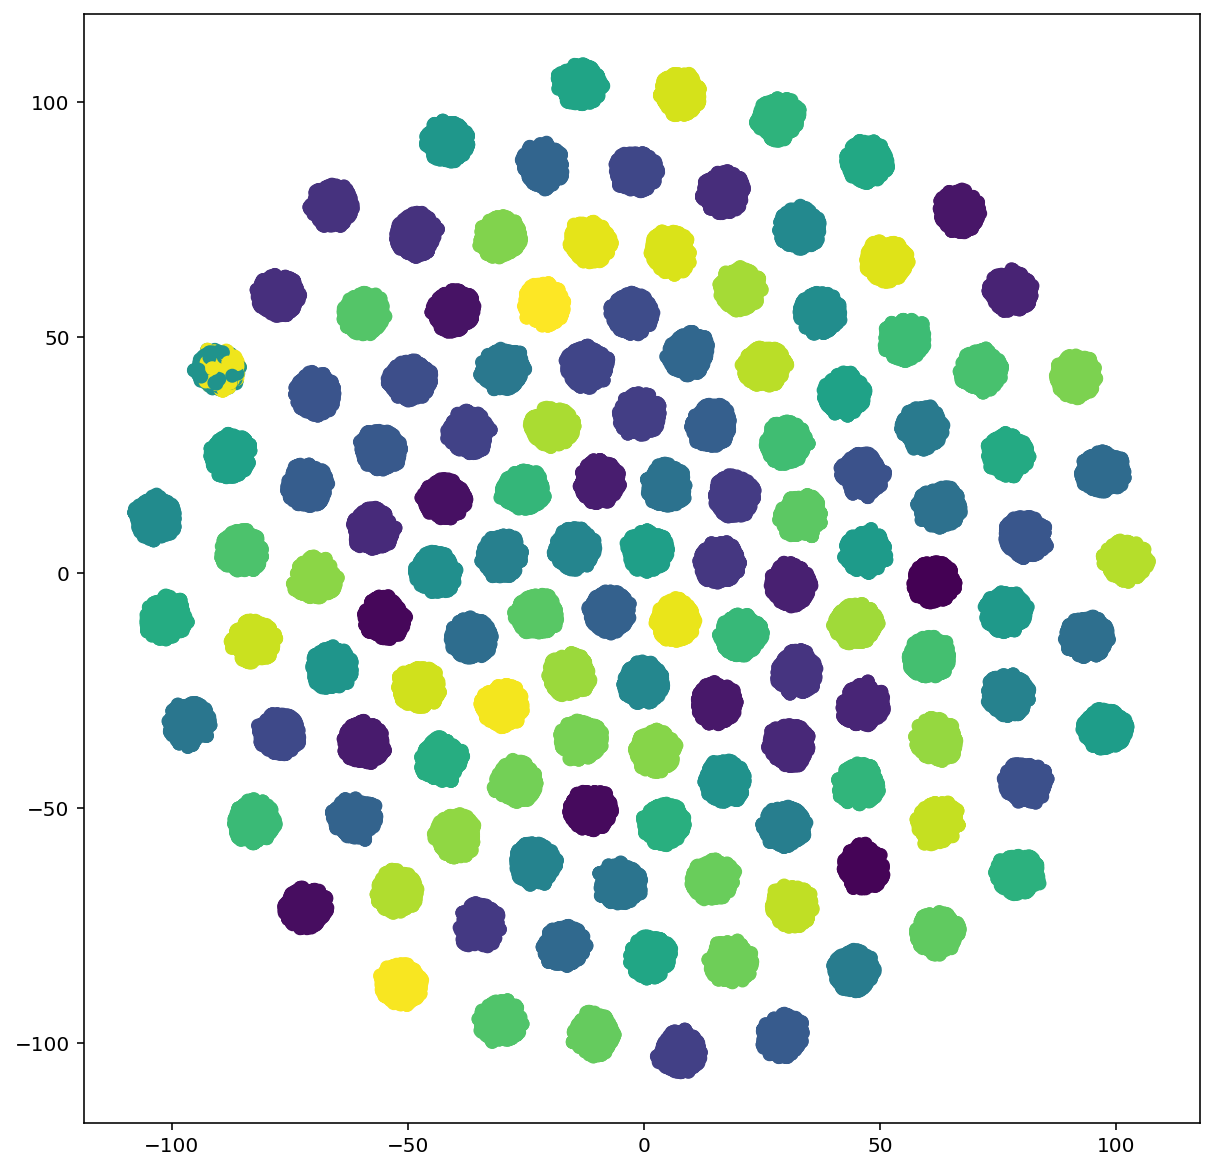

In [91]:
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=y)
plt.show()

In [92]:
mapping = {i : y.iloc[i, 0] for i in range(128)}
back_mappping = {v: k for k, v in mapping.items()}

In [93]:
unique_vals = set(mapping.values())
for i in range(128):
    if (i not in unique_vals):
        print(f"OPAAAAA: {i}")

OPAAAAA: 124


In [94]:
values, counts = np.unique(list(mapping.values()), return_counts=True)
for v, c in zip(values, counts):
    if c > 1:
        print(f"Value:{v} occurs {c} times")

Value:18 occurs 2 times


In [30]:
def dist(df, i, j):
    return np.sqrt(np.sum([(a-b) * (a-b) for a, b in zip(df.iloc[i], df.iloc[j])]))

In [32]:
for i, val in mapping.items():
    if val == 18:
        print(i, val)

11 18
57 18


In [35]:
dist(data, 11, 57)

34.64101615137755

In [37]:
data['responses'] = y
data['true'] = [i % 128 for i in range(data.shape[0])]

In [39]:
data.columns

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
       ...
               192,         193,         194,         195,         196,
               197,         198,         199, 'responses',      'true'],
      dtype='object', length=202)

In [61]:
wrong = data[data.responses != data.true]

In [69]:
data['responses'] = [back_mappping.get(val, -1) for val in y.values.reshape(-1)]

In [70]:
wrong

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,responses,true
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,...,0.00000,0.0,0.0000,0.00000,0.0000,0.00000,0.0,0.0000,40,0
1,0.0,0.0,0.0,0.0,10.0,0.0,0.000,0.00000,0.0,0.0,...,0.00000,10.0,0.0000,0.00000,0.0000,0.00000,0.0,0.0000,112,1
2,10.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,...,0.00000,0.0,0.0000,0.00000,0.0000,0.00000,10.0,0.0000,122,2
3,0.0,10.0,0.0,0.0,10.0,0.0,0.000,0.00000,0.0,10.0,...,0.00000,0.0,10.0000,0.00000,0.0000,0.00000,0.0,0.0000,47,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,...,0.00000,0.0,0.0000,0.00000,10.0000,0.00000,0.0,0.0000,91,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,...,9.59822,0.0,9.5532,0.00000,0.0000,0.00000,0.0,0.0000,75,27
99996,0.0,0.0,0.0,0.0,0.0,0.0,10.019,9.66597,0.0,0.0,...,0.00000,0.0,0.0000,9.95731,0.0000,0.00000,0.0,10.7858,22,28
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,...,0.00000,0.0,0.0000,0.00000,0.0000,9.01246,0.0,0.0000,0,29
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,...,0.00000,0.0,0.0000,0.00000,0.0000,0.00000,0.0,0.0000,119,30


In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=128, n_init=1, max_iter=30)
kmeans.fit(data)

KMeans(init='random', max_iter=30, n_clusters=128, n_init=1)

In [86]:
kmeans_results = kmeans.labels_

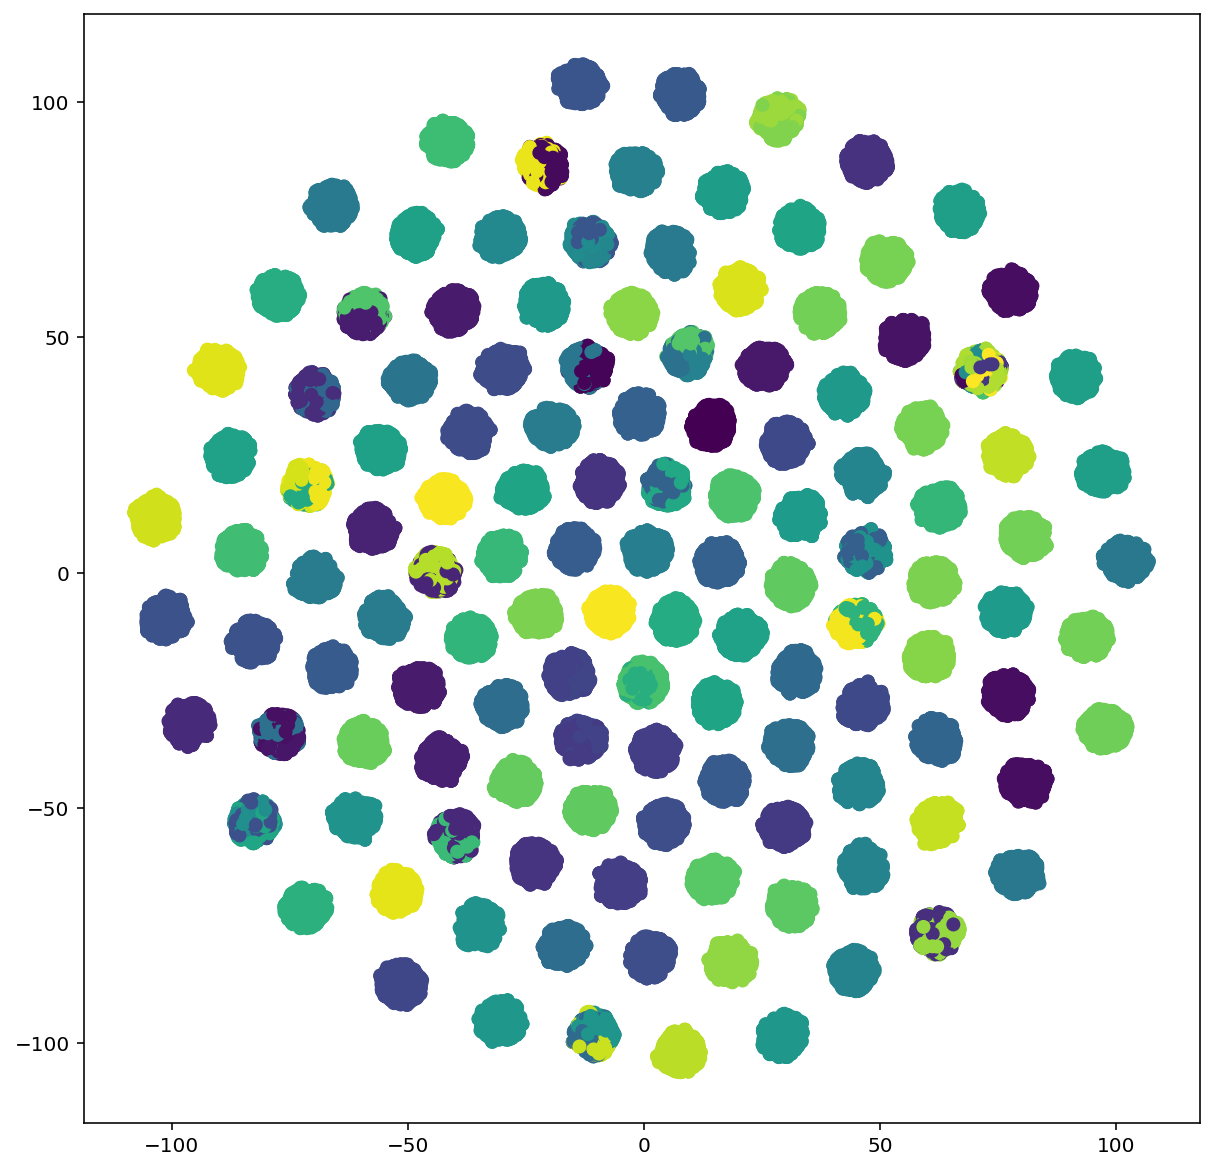

In [87]:
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=kmeans_results)
plt.show()

In [99]:
for idx, val in enumerate(data.max()):
    if val == 0:
        print(idx, val)

143 0.0


In [101]:
data[143].mean()

0.0